In [3]:
library(tidyverse)
library(plyr)
library(ggrepel)

In [4]:
code_dir <- getwd()
tool_dir <- unlist(strsplit(code_dir,"/"))
tool_dir <- head(tool_dir, length(tool_dir)-1)
tool_dir <- paste(c(tool_dir, "tools"), collapse="/")
source(file.path(tool_dir, "pl_functions.R"))
base_dir <- gsub("/plotting_codes", "", code_dir)
base_dir


── Column specification ────────────────────────────────────────────────────────
cols(
  gs_name = col_character(),
  type = col_character(),
  use = col_character(),
  plot_use = col_character(),
  abbr = col_character(),
  order = col_double()
)



── Column specification ────────────────────────────────────────────────────────
cols(
  gs_name = col_character(),
  gene_symbol = col_character()
)




[1] "/media/pipkin/ROCKET-PRO/CD8_DEV_SC"

In [5]:
exp_name <- "4_Runx3_Brg1_Meta"

use.path <- file.path(base_dir, '9_Figures', exp_name, 
                      'volcano_plots')
dir.create(use.path, showWarnings = FALSE, recursive=TRUE)
setwd(use.path)

In [6]:
base_dir

[1] "/media/pipkin/ROCKET-PRO/CD8_DEV_SC"

# Merged Ctrl versus RNAi

In [9]:
de.dir <- file.path(base_dir, '4_Runx3_Brg1_Meta/1_Brg1_RNA')


── Column specification ────────────────────────────────────────────────────────
cols(
  gene_name = col_character(),
  baseMean = col_double(),
  log2FoldChange = col_double(),
  lfcSE = col_double(),
  stat = col_double(),
  pvalue = col_double(),
  padj = col_double()
)




  side TE up Tstem
1   up     8    59
2   dn    27    19


Warning message:
“Removed 10331 rows containing missing values (geom_point).”
Warning message:
“Removed 68 rows containing missing values (geom_point).”
Warning message:
“Removed 10331 rows containing missing values (geom_point).”
Warning message:
“Removed 68 rows containing missing values (geom_point).”
Warning message:
“Removed 10331 rows containing missing values (geom_point).”
Warning message:
“Removed 68 rows containing missing values (geom_point).”


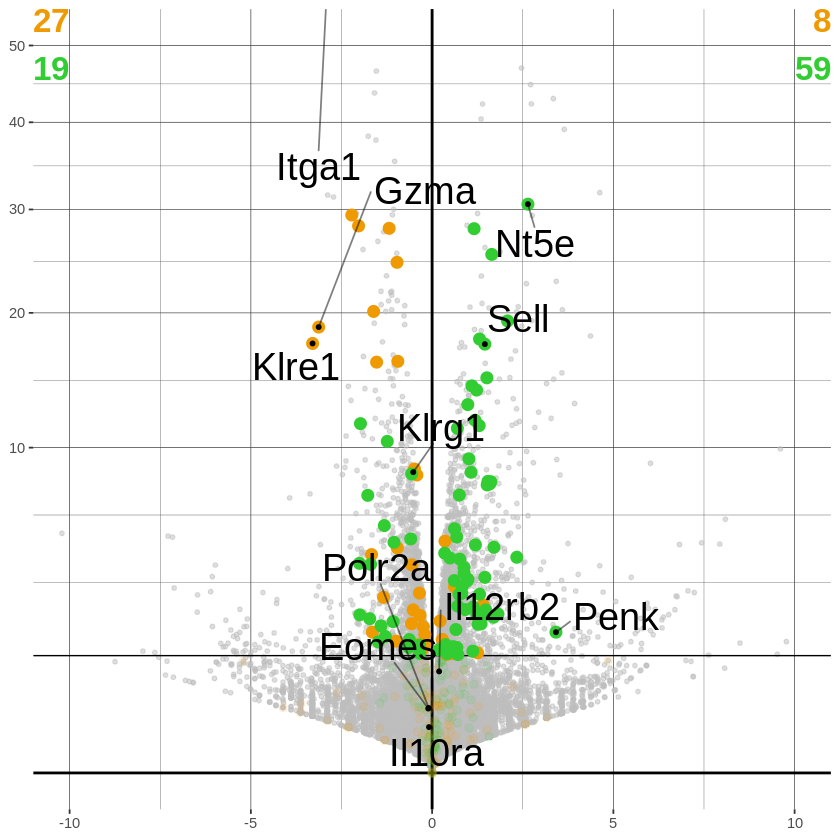

In [13]:
###----- Setup
de.file <- file.path(de.dir, 'shBrg1_vs_shCd19_gn.csv')
outname.base <- "shBrg1_vs_shCd19"
use.genes <- c("Il10ra", 'Itga1', 'Klrg1','Gzma','Polr2a','Il12rb2','Eomes','Sell')
log2fc.c <- 0
nlog10p.c <- 1.3
gs.vec <- c("TE up", "Tstem")
gs.col.vec <- c("orange2", "limegreen")
log2fc.range <- c(-10,10)
nlog10pval.max <- 50


de.df <- read_csv(de.file)
colnames(de.df) <- c('gene_name', 'baseMean', 'log2fc', 'lfcSE', 'stat', 'pvalue','padj','gene_name')
de.df$nlog10pval <- -log10(de.df$pvalue)

# Plot 
vol_plot_out <- volcano_plot_highlightGSEA(de.df, use.genes, gs.vec, gs.col.vec, 
                                           log2fc.c, nlog10p.c,log2fc.range, nlog10pval.max) # With label
vol_plot <- vol_plot_out$plot
vol_plot
ggsave(paste(outname.base, ".png", sep=""), vol_plot, device='png', width=10, height=10, units='cm')

# Save simplified plot
vol_plot <- vol_plot + theme(axis.text.x=element_blank(), axis.text.y=element_blank()) # Without label
ggsave(paste(outname.base, "_nolabel.png", sep=""), vol_plot, device='png', width=10, height=10, units='cm')

# Save summary
write_csv(vol_plot_out$sum, paste(outname.base, "_sum.csv", sep=""))

In [29]:
get_gs_genes()

[1] "Possible signatures for using:"
 [1] "48h Act up"     "DP up"          "EE up"          "Tex dn"        
 [5] "Tex up"         "JJM_Tcm"        "JJM_Trm"        "Rao_MEM"       
 [9] "MP up"          "Naive up"       "TE up"          "Tex_int down"  
[13] "Tex_int up"     "Tex prog1 down" "Tex prog1 up"   "Tex prog2 down"
[17] "Tex prog2 up"   "Tex_term dn"    "Tex_term up"    "Tstem"         
[21] "Best_1"         "Best_10"        "Best_2"         "Best_3"        
[25] "Best_4"         "Best_5"         "Best_6"         "Best_7"        
[29] "Best_8"         "Best_9"         "Day5KLRG1hi up" "TRM_vs_TCM-TEM"
[33] "TCM_vs_TEM-TRM" "Day5KLRG1lo up" "TEM_vs_TCM-TRM"
